In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.model_selection import cross_val_score
import joblib

## Given:
### [Real or Fake] : Fake Job Description Prediction
### This dataset contains 18K job descriptions out of which about 800 are fake. The data consists of both textual information and meta-information about the jobs. The dataset can be used to create classification models which can learn the job descriptions which are fraudulent.

## Goal:
### 1. Create a classification model that uses text data features and meta-features and predict which job description are fraudulent or real.

## Load and Analyze the data:

In [3]:
df = pd.read_csv("../data/raw/fake_job_postings.csv", index_col=0)
df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
job_id,,,,,,,,,,,,,,,,,
1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17880 entries, 1 to 17880
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17879 non-null  object
 6   requirements         15184 non-null  object
 7   benefits             10668 non-null  object
 8   telecommuting        17880 non-null  int64 
 9   has_company_logo     17880 non-null  int64 
 10  has_questions        17880 non-null  int64 
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  object
 16  fraudulen

In [5]:
df.isna().sum()

title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [6]:
df.shape

(17880, 17)

In [7]:
# Count the occurrences of 0 and 1 in the 'fraudulent' column
fraudulent_counts = df['fraudulent'].value_counts()
fraudulent_counts



fraudulent
0    17014
1      866
Name: count, dtype: int64

<Axes: xlabel='fraudulent', ylabel='count'>

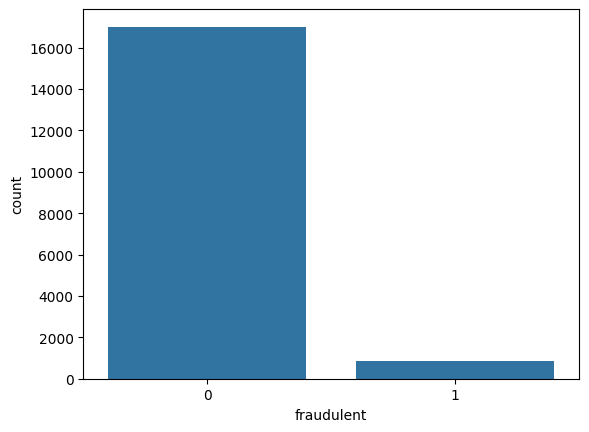

In [8]:
sns.countplot(x = "fraudulent" , data = df)

## Select features:


In [9]:
#how do i make correletion between string features and target
description_df = df.copy()
description_df = description_df[['description','fraudulent']]

# Checking for null values and empty strings

print(f"{description_df.isna().sum()} null values")
print(f"{(description_df == '').sum()} empty strings")
print(description_df.shape)

description    1
fraudulent     0
dtype: int64 null values
description    0
fraudulent     0
dtype: int64 empty strings
(17880, 2)


In [10]:
#removing null values

description_df.dropna(subset=['description'], inplace=True)
print(f"{description_df.isna().sum()} null values")


description    0
fraudulent     0
dtype: int64 null values


## Save the dataset

In [11]:
#save the dataset

#description_df.to_csv("../data/processed/description_df.csv")

## Spliting the data into training and testing sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    description_df['description'],
    description_df['fraudulent'],
    random_state=42)



print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#X_train.to_csv("../data/processed/X_train.csv")

(13409,)
(13409,)
(4470,)
(4470,)


## Converting text data into TF-IDF features

In [13]:
# TF-IDF transformer is fitted only on the training data

vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1, 2))
vectorizer.fit(X_train)
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')
# Transform the text data into TF-IDF vectors

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

# When i try to add another feature i get (2,2) shape  
# one way to get around this is by combining all of the string features in one column and then vectorize them 


In [14]:
print(X_train.shape)
print(X_test.shape)


(13409, 571298)
(4470, 571298)


## Oversampling because the dataset is imbalanced

In [15]:
# Creating an instance of SMOTE
smote = SMOTE()

# Balancing the data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(X_resampled.shape)
print(y_resampled.shape)

(25520, 571298)
(25520,)


## Train the model with GridSearchCV

In [16]:
parameters = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}
model = MultinomialNB()
clf = GridSearchCV(model, parameters,cv=10, n_jobs=-1)
clf.fit(X_resampled, y_resampled)

GridSearchCV(cv=10, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]})

In [17]:
print(clf.best_params_)
print(clf.best_score_)

{'alpha': 0.1}
0.9950235109717868


## Test and evaluation

In [18]:
train_accuracy = clf.score(X_resampled, y_resampled)
test_accuracy = clf.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.998550156739812
Test Accuracy: 0.9758389261744966


In [19]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)       # Calculate the accuracy
report = classification_report(y_test, y_pred)  # Get the precision, recall, f1-score

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4254
           1       0.77      0.71      0.74       216

    accuracy                           0.98      4470
   macro avg       0.88      0.85      0.86      4470
weighted avg       0.97      0.98      0.98      4470



In [21]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1]) 
print(conf_matrix)

[[4209   45]
 [  63  153]]


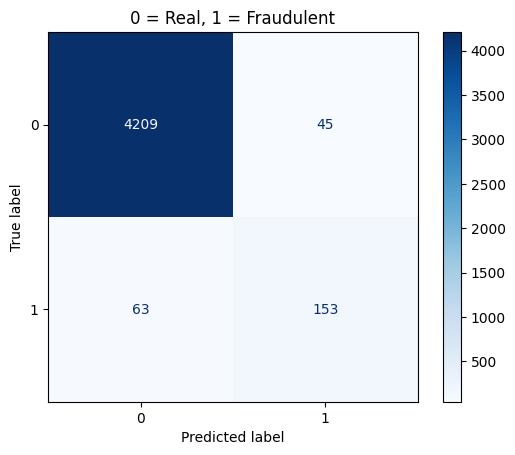

In [22]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.title("0 = Real, 1 = Fraudulent")
plt.show()

## Save the model

In [23]:
best_model = clf.best_estimator_
#joblib.dump(best_model, '../models/modelMNB_v1.pkl')


In [28]:
print(df.iloc[14,5])

Are you interested in a satisfying and financially rewarding role in a high growth technology company? You’ll work in a casual yet high energy environment alongside passionate people delivering the leading competitive intelligence solution to major global brands. With the continued rapid growth of digital marketing and PPC a huge opportunity exists to further expand the Adthena enterprise client base. We are seeking an experienced Account Executive to develop and close new business in enterprise accounts. A large opportunity exists across all major search engine verticals including: Auto, Retail, Gaming, Travel, Finance, Insurance and Education.Primarily you’ll use a consultative approach to determine customer needs and deliver presentations and technical demonstrations. Where required, you will work with a client’s advertising agency to uncover value for prospective customers. You’ll be supported by marketing and business development reps to build a pipeline of accounts.


In [25]:
predict = clf.predict(vectorizer.transform([df.iloc[1,5]]))
print(predict)
print(type(df.iloc[1,5]))
tmp = vectorizer.transform([df.iloc[1,5]])
print(type(tmp))
tmp.shape
print(tmp)


[0]
<class 'str'>
<class 'scipy.sparse._csr.csr_matrix'>
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 328 stored elements and shape (1, 571298)>
  Coords	Values
  (0, 85)	0.05355311836419852
  (0, 227)	0.053623904508121434
  (0, 267)	0.05079174234908878
  (0, 705)	0.028274251440808744
  (0, 761)	0.05713048597492417
  (0, 3688)	0.027879648092626524
  (0, 3723)	0.039470256739820964
  (0, 4767)	0.02969209254429222
  (0, 4795)	0.04673994309442042
  (0, 4875)	0.025935220746678023
  (0, 4927)	0.05204915530420576
  (0, 5978)	0.1704729792549092
  (0, 6006)	0.1857937850829879
  (0, 6015)	0.05138896086455005
  (0, 8906)	0.02347050848325048
  (0, 9051)	0.03185172551221886
  (0, 16263)	0.02895187579911161
  (0, 16310)	0.06147378205326597
  (0, 18906)	0.039855981680719424
  (0, 18924)	0.05713048597492417
  (0, 19411)	0.03928594781402819
  (0, 19429)	0.053623904508121434
  (0, 19684)	0.02773425753962613
  (0, 19778)	0.053623904508121434
  (0, 24118)	0.015919806170952497
  :	:
  (0, 